In [1]:
import pandas as pd

# Load the uploaded file
file_path = 'data/accuracy_list.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()

,threshold,accuracy
0,0.1200,0.745421
1,0.1201,0.747253
2,0.1202,0.747253
3,0.1203,0.747253
4,0.1204,0.747253


In [2]:
import matplotlib.pyplot as plt

# Extracting data for the trend plot
threshold = data['threshold']
accuracy = data['accuracy']

In [3]:
# Find the maximum accuracy and corresponding threshold
max_accuracy = accuracy.max()
max_threshold = threshold[accuracy.idxmax()]

In [4]:
print(f"Max accuracy:{max_accuracy}, Max threshold: {max_threshold}")

Max accuracy:0.7857142857142857, Max threshold: 0.1289000000000002


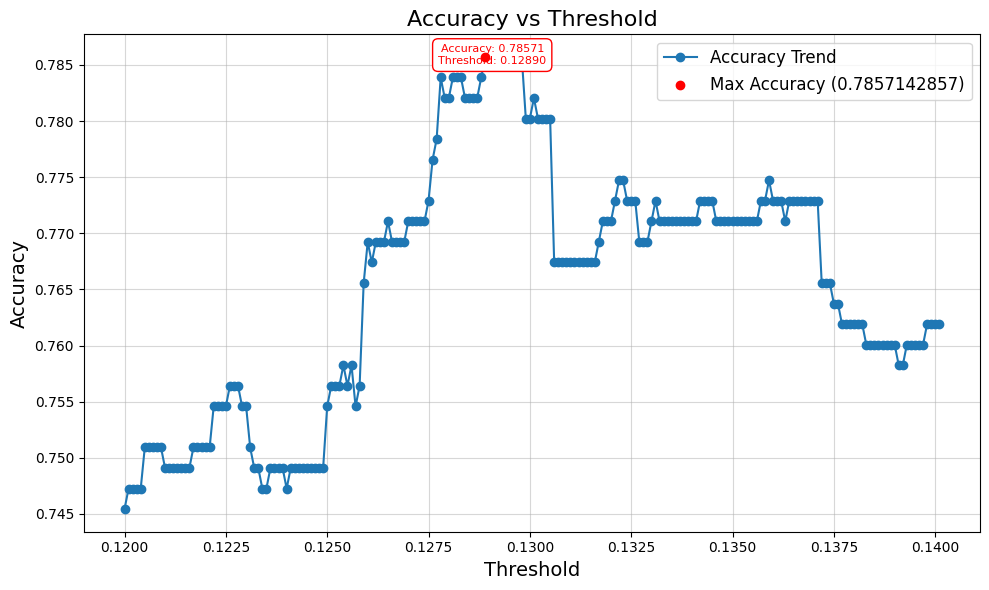

In [10]:
# Plotting the trend graph with the maximum point and its corresponding threshold highlighted
plt.figure(figsize=(10, 6))
plt.plot(threshold, accuracy, marker='o', linestyle='-', label='Accuracy Trend')
plt.scatter(max_threshold, max_accuracy, color='red', label=f'Max Accuracy ({max_accuracy:.10f})', zorder=5)

# Annotate the maximum point with accuracy and threshold
plt.annotate(f'Accuracy: {max_accuracy:.5f}\nThreshold: {max_threshold:.5f}', 
             (max_threshold, max_accuracy), 
             textcoords="offset points", 
             xytext=(5, -5), 
             ha='center', fontsize=8, color='red', bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.5'))

plt.title('Accuracy vs Threshold', fontsize=16)
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [11]:
import ast

In [12]:
永豐銀行_2022_path = 'data/tcfd_report_pdf_chunks_matching_result_第四層/永豐銀行_2022_300_50_matched_chunks.csv'
永豐銀行 = pd.read_csv(永豐銀行_2022_path)
永豐銀行 = [
    {
        'Filename': row['Filename'],
        'Chunk_ID': row['Chunk_ID'],
        'Chunk_Text': row['Chunk_Text'],
        'Matched_Categories':ast.literal_eval(row['Matched_Categories']),
        'Embedding': ast.literal_eval(row['Embedding'])
    }
    for _, row in 永豐銀行.iterrows()
]

In [13]:
富邦金控_2022_path = 'data/tcfd_report_pdf_chunks_matching_result_第四層/富邦金控_2022_300_50_matched_chunks.csv'
富邦金控 = pd.read_csv(富邦金控_2022_path)
富邦金控 = [
    {
        'Filename': row['Filename'],
        'Chunk_ID': row['Chunk_ID'],
        'Chunk_Text': row['Chunk_Text'],
        'Matched_Categories':ast.literal_eval(row['Matched_Categories']),
        'Embedding': ast.literal_eval(row['Embedding'])
    }
    for _, row in 富邦金控.iterrows()
]

In [14]:
華泰銀行_2022_path = 'data/tcfd_report_pdf_chunks_matching_result_第四層/華泰銀行_2022_300_50_matched_chunks.csv'
華泰銀行 = pd.read_csv(華泰銀行_2022_path)
華泰銀行 = [
    {
        'Filename': row['Filename'],
        'Chunk_ID': row['Chunk_ID'],
        'Chunk_Text': row['Chunk_Text'],
        'Matched_Categories':ast.literal_eval(row['Matched_Categories']),
        'Embedding': ast.literal_eval(row['Embedding'])
    }
    for _, row in 華泰銀行.iterrows()
]

In [15]:
開發金控_2021_path = 'data/tcfd_report_pdf_chunks_matching_result_第四層/開發金控_2021_300_50_matched_chunks.csv'
開發金控 = pd.read_csv(開發金控_2021_path)
開發金控 = [
    {
        'Filename': row['Filename'],
        'Chunk_ID': row['Chunk_ID'],
        'Chunk_Text': row['Chunk_Text'],
        'Matched_Categories':ast.literal_eval(row['Matched_Categories']),
        'Embedding': ast.literal_eval(row['Embedding'])
    }
    for _, row in 開發金控.iterrows()
]

In [16]:
新光金控_2022_path = 'data/tcfd_report_pdf_chunks_matching_result_第四層/新光金控_2022_300_50_matched_chunks.csv'
新光金控 = pd.read_csv(新光金控_2022_path)
新光金控 = [
    {
        'Filename': row['Filename'],
        'Chunk_ID': row['Chunk_ID'],
        'Chunk_Text': row['Chunk_Text'],
        'Matched_Categories':ast.literal_eval(row['Matched_Categories']),
        'Embedding': ast.literal_eval(row['Embedding'])
    }
    for _, row in 新光金控.iterrows()
]

In [17]:
瑞興銀行_2022_path = 'data/tcfd_report_pdf_chunks_matching_result_第四層/瑞興銀行_2022_300_50_matched_chunks.csv'
瑞興銀行 = pd.read_csv(瑞興銀行_2022_path)
瑞興銀行 = [
    {
        'Filename': row['Filename'],
        'Chunk_ID': row['Chunk_ID'],
        'Chunk_Text': row['Chunk_Text'],
        'Matched_Categories':ast.literal_eval(row['Matched_Categories']),
        'Embedding': ast.literal_eval(row['Embedding'])
    }
    for _, row in 瑞興銀行.iterrows()
]

In [18]:
def load_answer(institution, year):
    ANSWER_PATH = "data/answer/rank.xlsx"
    latest_answer_df = pd.read_excel(ANSWER_PATH)
    if(institution[2:4] == "金控"):
        institution = institution[0:2] + "金"
    # print(latest_answer_df)
    # print(institution)
    year = int(year)
    answer_for_institution = latest_answer_df[latest_answer_df['Financial_Institutions'] == institution]
    # print(f"Unique values in latest_answer_df['Year']: {latest_answer_df['Year'].unique()}")
    # print(f"Type of 'Year' column: {latest_answer_df['Year'].dtype}")
    # print(f"Value of year: {year}, type: {type(year)}")
    answer_for_institution = answer_for_institution[answer_for_institution['Year'] == year]

    # print(answer_for_institution)
    if not answer_for_institution.empty:
        columns_to_print = answer_for_institution.loc[:, "Q1":"Q82"].iloc[0].to_dict()
    else:
        raise ValueError(f"No matching answers found for institution {institution} in year {year}")

    # print(answer_for_institution.loc[:, "Q1":"Q82"])
    return columns_to_print

In [21]:
def calculate_accuracy(answer, report_dict):
    correct_count = 0
    total_questions = len(answer)
    print(answer)
    for key, value in answer.items():
        if isinstance(value, float) and str(value) == 'nan':
            continue

        question_id = key[1:]  # 去掉 'Q' 提取後面的部分

        # 搜尋第二份資料的 Matched_Categories
        matched_categories = []
        for entry in report_dict:

            if 'Matched_Categories' in entry:
                for category in entry['Matched_Categories']:
                    clean_category = category.replace('#', '')  # 移除井字號
                    matched_categories.append(clean_category.split('_')[-1])  # 取最後的部分
        if question_id in matched_categories:
            # 第二份資料中有出現此類別
            if value == 1.0:
                correct_count += 1  # 答對
        else:
            # 第二份資料中沒有出現此類別
            if value == 0.0:
                correct_count += 1  # 答對
    print(matched_categories)
    accuracy = correct_count / total_questions
    return accuracy

In [22]:
print(f"永豐銀行:{calculate_accuracy(load_answer('永豐銀行', 2022), 永豐銀行)}")
print(f"富邦金控:{calculate_accuracy(load_answer('富邦金控', 2022), 富邦金控)}")
print(f"華泰銀行:{calculate_accuracy(load_answer('華泰銀行', 2022), 華泰銀行)}")
print(f"開發金控:{calculate_accuracy(load_answer('開發金控', 2021), 開發金控)}")
print(f"新光金控:{calculate_accuracy(load_answer('新光金控', 2022), 新光金控)}")
print(f"瑞興銀行:{calculate_accuracy(load_answer('永豐銀行', 2022), 永豐銀行)}")

{'Q1': 1.0, 'Q2': 1.0, 'Q3': 1.0, 'Q4': 0.0, 'Q5': 1.0, 'Q6': 1.0, 'Q7': 1.0, 'Q8': 1.0, 'Q9': 1.0, 'Q10': 0.0, 'Q11': 1.0, 'Q12': 1.0, 'Q13': 1.0, 'Q14': 1.0, 'Q15': 1.0, 'Q16': 1.0, 'Q17': 1.0, 'Q18': 1.0, 'Q19': 1.0, 'Q20': 1.0, 'Q21': 1.0, 'Q22': 1.0, 'QS1': 1.0, 'QS2': 1.0, 'Q23': 1.0, 'Q24': 1.0, 'Q25': 1.0, 'Q26': 1.0, 'Q27': 0.0, 'Q28': 1.0, 'Q29': 1.0, 'Q30': 0.0, 'Q31': 1.0, 'Q32': 1.0, 'Q33': 1.0, 'Q34': 1.0, 'Q35': 1.0, 'Q36': 1.0, 'Q37': 1.0, 'Q38': 1.0, 'Q39': 1.0, 'Q40': 1.0, 'Q41': 1.0, 'Q42': 1.0, 'Q43': 1.0, 'Q44': 1.0, 'Q45': 1.0, 'Q46': 1.0, 'Q47': 0.0, 'Q48': 1.0, 'Q49': 1.0, 'Q50': 0.0, 'QR1': 1.0, 'QR2': 0.0, 'Q51': 1.0, 'Q52': 1.0, 'Q53': 1.0, 'Q54': 1.0, 'Q55': 1.0, 'Q56': 1.0, 'Q57': 1.0, 'Q58': 0.0, 'Q59': 1.0, 'Q60': 1.0, 'Q61': 1.0, 'Q62': 1.0, 'Q63': 0.0, 'Q64': 1.0, 'Q65': 1.0, 'Q66': 0.0, 'QMT1': 1.0, 'QMT2': 1.0, 'QMT3': 0.0, 'QMT4': 0.0, 'Q67': 1.0, 'Q68': 1.0, 'Q69': 1.0, 'Q70': nan, 'Q71': 1.0, 'Q72': 0.0, 'Q73': 1.0, 'QMT5': 1.0, 'Q74': 1.0, 'Q75': 

In [23]:
def create_accuracy_dataframe(answer, report_dict):
    # Initialize a DataFrame with the questions as the index
    question_ids = sorted(answer.keys())
    df = pd.DataFrame(index=question_ids, columns=['Answer', 'Report_Match'])

    # Populate the 'Answer' column from the `answer` dictionary
    df['Answer'] = [answer[qid] if qid in answer else 0.0 for qid in question_ids]

    # Extract matched categories from `report_dict`
    matched_categories = set()
    for entry in report_dict:
        if 'Matched_Categories' in entry:
            for category in entry['Matched_Categories']:
                clean_category = category.replace('#', '').split('_')[-1]
                matched_categories.add(clean_category)

    # Populate the 'Report_Match' column based on presence in `matched_categories`
    df['Report_Match'] = [
        1 if qid[1:] in matched_categories else 0 for qid in question_ids
    ]

    return df

In [31]:
pd.set_option('display.max_rows', 100)

In [37]:
print(f"永豐銀行:\n{create_accuracy_dataframe(load_answer('永豐銀行', 2022), 永豐銀行)}")
print("--------------------------------")
print(f"富邦金控:\n{create_accuracy_dataframe(load_answer('富邦金控', 2022), 富邦金控)}")
print("--------------------------------")
print(f"華泰銀行:\n{create_accuracy_dataframe(load_answer('華泰銀行', 2022), 華泰銀行)}")
print("--------------------------------")
print(f"開發金控:\n{create_accuracy_dataframe(load_answer('開發金控', 2021), 開發金控)}")
print("--------------------------------")
print(f"新光金控:\n{create_accuracy_dataframe(load_answer('新光金控', 2022), 新光金控)}")
print("--------------------------------")
print(f"瑞興銀行:\n{create_accuracy_dataframe(load_answer('永豐銀行', 2022), 永豐銀行)}")

永豐銀行:
      Answer  Report_Match
Q1       1.0             1
Q10      0.0             1
Q11      1.0             1
Q12      1.0             1
Q13      1.0             1
Q14      1.0             1
Q15      1.0             1
Q16      1.0             1
Q17      1.0             1
Q18      1.0             1
Q19      1.0             1
Q2       1.0             1
Q20      1.0             1
Q21      1.0             1
Q22      1.0             1
Q23      1.0             1
Q24      1.0             1
Q25      1.0             1
Q26      1.0             1
Q27      0.0             1
Q28      1.0             1
Q29      1.0             1
Q3       1.0             1
Q30      0.0             0
Q31      1.0             1
Q32      1.0             1
Q33      1.0             1
Q34      1.0             1
Q35      1.0             1
Q36      1.0             0
Q37      1.0             1
Q38      1.0             1
Q39      1.0             1
Q4       0.0             1
Q40      1.0             1
Q41      1.0          